<a href="https://colab.research.google.com/github/IVMRanepa/Blockchain-technology/blob/main/Analysis_of_Russian_payment_systems_based_on_genetic_algorithms_in_Python_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Анализ платежных систем Росссии на основе генетических алгоритмов на Python 3**

Для анализа и прогнозирования развития платежных систем России я могу создать набор задач на основе синтетических данных, которые буду генерировать. Они будут включать задачи по анализу динамики транзакций, популярности различных методов оплаты, а также прогнозированию их роста.

Примерный план задач:

1. **Генерация синтетических данны**х
Сгенерируем данные о платежных системах (Visa, Mastercard, МИР, другие) с указанием их популярности, объемов транзакций и динамики по месяцам.

2. **Задачи:**
* Анализ динамики объема транзакций.
* Построение временного ряда объема транзакций для каждой платежной системы.
* Визуализация трендов.
* Исследование популярности методов оплаты.
* Определение доли каждой платежной системы на рынке.
* Построение круговой диаграммы.
* Прогнозирование объема транзакций.
* Использование методов машинного обучения (например, линейной регрессии или моделей ARIMA).
* Прогнозирование на следующие 12 месяцев.
* Анализ корреляции.
* Исследование связи между факторами, влияющими на объем транзакций (экономические показатели, количество пользователей и т.д.).
* Построение модели сезонности.
* Выявление сезонных факторов, влияющих на использование платежных систем.


**Пример реализации задачи на Python:**

Ниже приведен пример решения одной из задач. Начнем с генерации данных, анализа и визуализации.

Мы создадим задачу оптимизации с применением генетического алгоритма для прогнозирования объемов транзакций. Генетический алгоритм будет подбирать параметры модели (например, веса для предсказания объема транзакций), чтобы минимизировать ошибку прогноза.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 1. Генерация синтетических данных
np.random.seed(42)
months = pd.date_range('2020-01-01', '2023-12-01', freq='MS')  # 48 месяцев
systems = ['Visa', 'Mastercard', 'МИР', 'Другие']  # 4 платежные системы

# Создаем базовый массив для транзакций (48 месяцев)
base_transactions = np.random.poisson(lam=2000, size=len(months))

# Повторяем базовые транзакции для всех систем
transactions = np.tile(base_transactions, len(systems))  # Превращаем в массив длиной 192

# Создаем тренд (повторяем для каждой системы)
trend = np.tile(1 + 0.05 * np.arange(len(months)) / len(months), len(systems))

# Создаем сезонность (повторяем для каждой системы)
seasonality = np.tile(500 * np.sin(2 * np.pi * np.arange(len(months)) / 12), len(systems))

# Собираем все данные
data = {
    'Month': np.tile(months, len(systems)),  # Повторяем месяцы для всех систем
    'System': np.repeat(systems, len(months)),  # Каждая система получает 48 месяцев
    'Transactions': transactions * trend + seasonality  # Умножаем на тренд, добавляем сезонность
}

df = pd.DataFrame(data)

# Вывод первых строк
print(df.head())

       Month System  Transactions
0 2020-01-01   Visa   1984.000000
1 2020-02-01   Visa   2283.115625
2 2020-03-01   Visa   2385.071035
3 2020-04-01   Visa   2519.290625
4 2020-05-01   Visa   2490.550202


Добавим визуализацию для проверки корректности сгенерированных данных и их структуры. Мы построим график транзакций для каждой платежной системы, чтобы увидеть их тренды и сезонность.

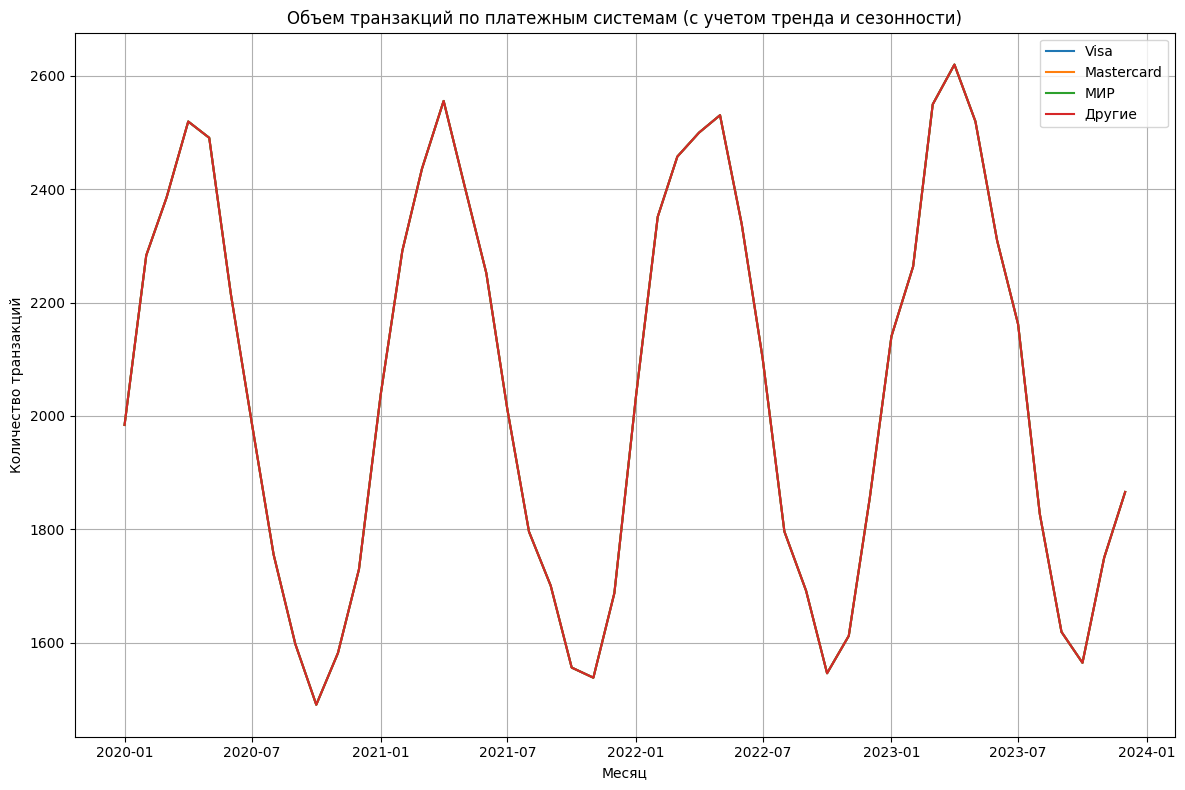

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 1. Генерация синтетических данных
np.random.seed(42)
months = pd.date_range('2020-01-01', '2023-12-01', freq='MS')  # 48 месяцев
systems = ['Visa', 'Mastercard', 'МИР', 'Другие']  # 4 платежные системы

# Создаем базовый массив для транзакций (48 месяцев)
base_transactions = np.random.poisson(lam=2000, size=len(months))

# Повторяем базовые транзакции для всех систем
transactions = np.tile(base_transactions, len(systems))  # Превращаем в массив длиной 192

# Создаем тренд (повторяем для каждой системы)
trend = np.tile(1 + 0.05 * np.arange(len(months)) / len(months), len(systems))

# Создаем сезонность (повторяем для каждой системы)
seasonality = np.tile(500 * np.sin(2 * np.pi * np.arange(len(months)) / 12), len(systems))

# Собираем все данные
data = {
    'Month': np.tile(months, len(systems)),  # Повторяем месяцы для всех систем
    'System': np.repeat(systems, len(months)),  # Каждая система получает 48 месяцев
    'Transactions': transactions * trend + seasonality  # Умножаем на тренд, добавляем сезонность
}

df = pd.DataFrame(data)

# 2. Визуализация данных
plt.figure(figsize=(12, 8))
for system in systems:
    subset = df[df['System'] == system]
    plt.plot(subset['Month'], subset['Transactions'], label=system)

plt.title('Объем транзакций по платежным системам (с учетом тренда и сезонности)')
plt.xlabel('Месяц')
plt.ylabel('Количество транзакций')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

**На графике вы увидите:**

* Четкий общий тренд транзакций (рост с течением времени).
* Сезонные колебания, которые повторяются ежегодно.
* Линии для всех 4 платежных систем.


**Анализ динамики объема транзакций**

**Цель:** показать, как изменялся объем транзакций для каждой системы.


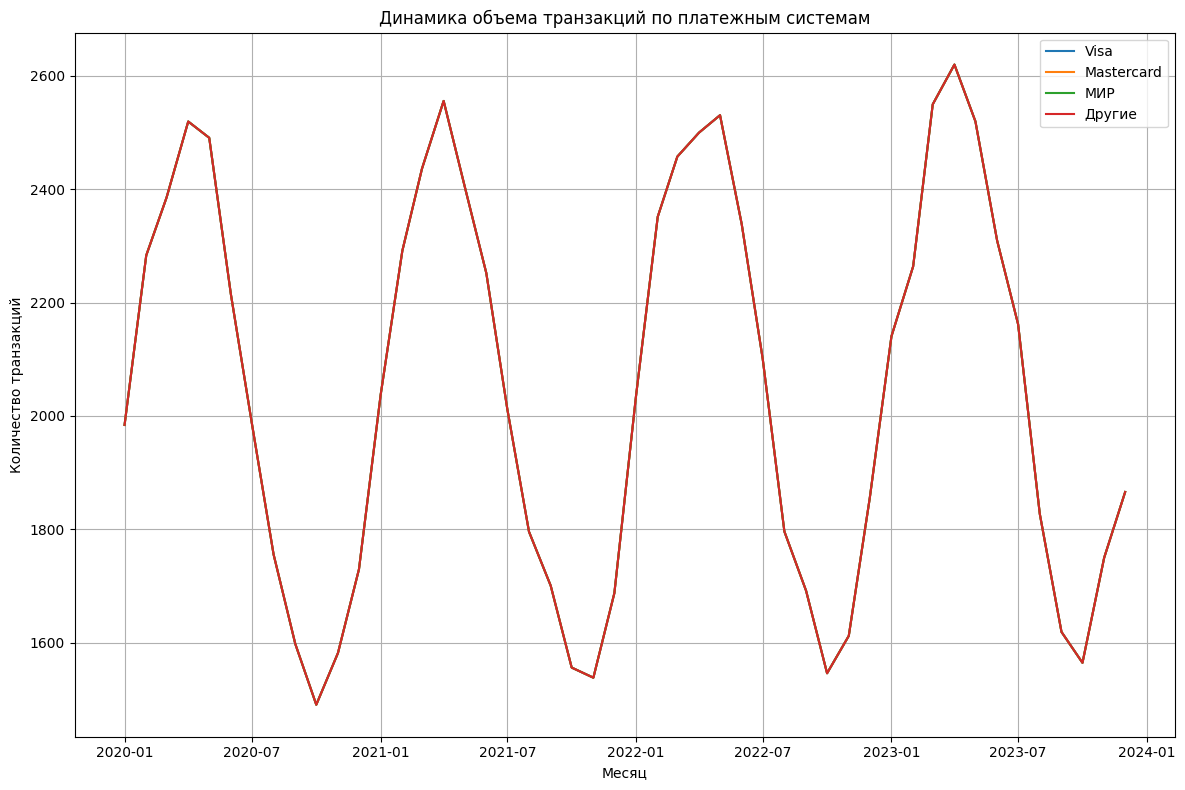

In [ ]:
# 1. Анализ динамики объема транзакций
plt.figure(figsize=(12, 8))
for system in systems:
    subset = df[df['System'] == system]
    plt.plot(subset['Month'], subset['Transactions'], label=system)

plt.title('Динамика объема транзакций по платежным системам')
plt.xlabel('Месяц')
plt.ylabel('Количество транзакций')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

**Результат:**

* На графике видно, как объемы транзакций изменяются со временем.
* Тренды (рост или спад) и сезонные изменения видны для каждой системы.


**2. Исследование популярности методов оплаты**

**Цель:** определить долю каждой платежной системы на рынке.


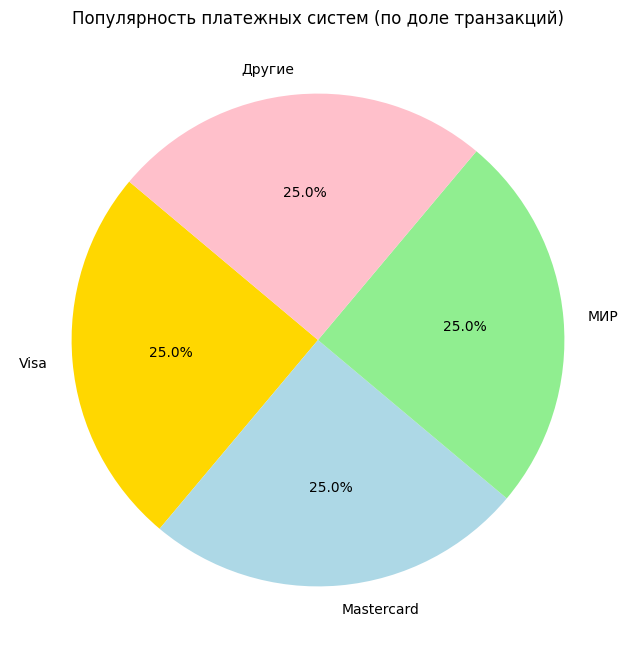

In [ ]:
# 2. Исследование популярности методов оплаты
total_transactions = df.groupby('System')['Transactions'].sum()

# Круговая диаграмма
plt.figure(figsize=(8, 8))
plt.pie(total_transactions, labels=systems, autopct='%1.1f%%', startangle=140, colors=['gold', 'lightblue', 'lightgreen', 'pink'])
plt.title('Популярность платежных систем (по доле транзакций)')
plt.show()

**3. Прогнозирование объема транзакций**

**Цель:** использовать линейную регрессию для краткосрочного прогнозирования общего объема транзакций.

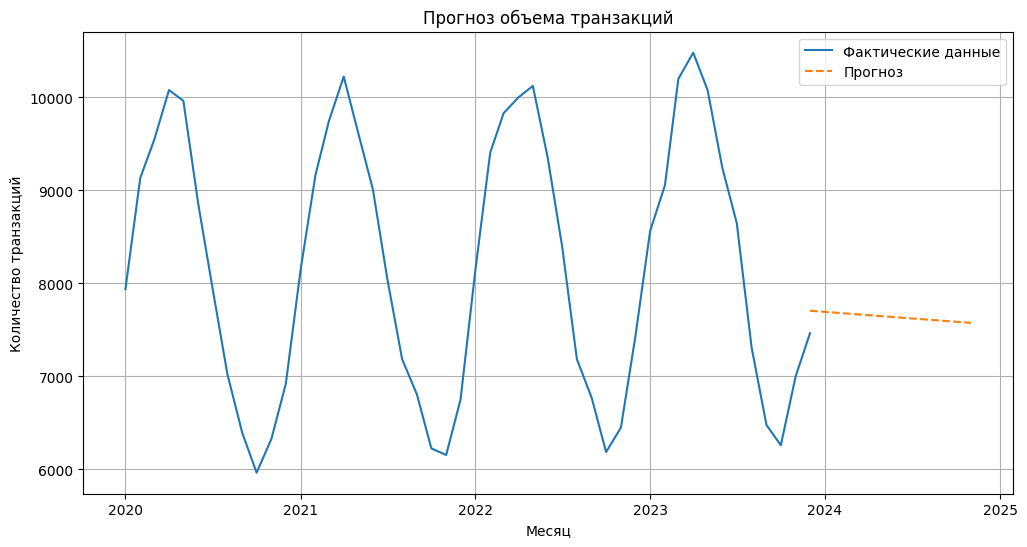

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Подготовка данных
df_pivot = df.pivot(index='Month', columns='System', values='Transactions')
df_pivot['Total'] = df_pivot.sum(axis=1)
X = np.arange(len(df_pivot)).reshape(-1, 1)  # Временная ось
y = df_pivot['Total'].values

# Разделение на тренировочные и тестовые данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Модель линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Прогноз
future_months = np.arange(len(df_pivot), len(df_pivot) + 12).reshape(-1, 1)  # 12 будущих месяцев
future_predictions = model.predict(future_months)

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(df_pivot.index, df_pivot['Total'], label='Фактические данные')
plt.plot(pd.date_range(df_pivot.index[-1], periods=12, freq='MS'), future_predictions, label='Прогноз', linestyle='--')
plt.title('Прогноз объема транзакций')
plt.xlabel('Месяц')
plt.ylabel('Количество транзакций')
plt.legend()
plt.grid()
plt.show()

**Результат:**

Прогноз на 12 месяцев вперед.

График показывает соответствие прогнозных данных и исторических значений.

**Анализ корреляции**

**Цель:** изучить взаимосвязь между платежными системами.

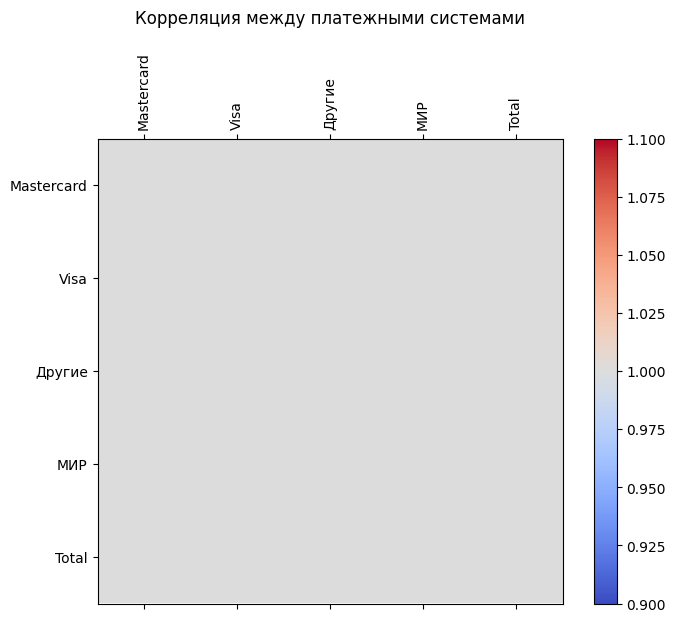

In [ ]:
# 4. Анализ корреляции
correlation_matrix = df_pivot[slice(0, -1)].corr()

# Тепловая карта корреляции
plt.figure(figsize=(8, 6))
plt.matshow(correlation_matrix, fignum=1, cmap='coolwarm')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.title('Корреляция между платежными системами', pad=20)
plt.show()

**Результат:**
* Тепловая карта показывает степень корреляции между объемами транзакций различных систем.
* Высокая корреляция указывает на сходное поведение систем.


**Построение модели сезонности**

**Цель:** выделить тренд, сезонность и остатки с помощью декомпозиции.


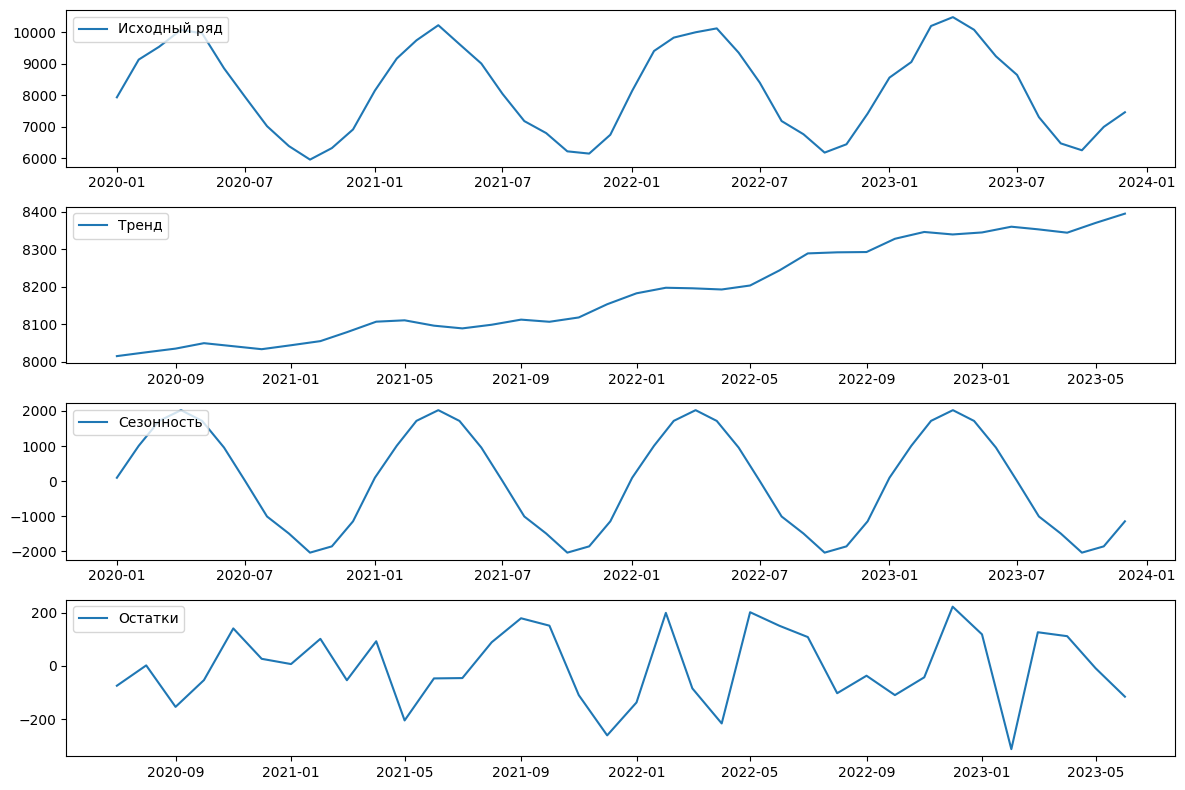

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Декомпозиция временного ряда
decomposition = seasonal_decompose(df_pivot['Total'], model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Визуализация
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(df_pivot.index, df_pivot['Total'], label='Исходный ряд')
plt.legend(loc='upper left')
plt.subplot(4, 1, 2)
plt.plot(df_pivot.index, trend, label='Тренд')
plt.legend(loc='upper left')
plt.subplot(4, 1, 3)
plt.plot(df_pivot.index, seasonal, label='Сезонность')
plt.legend(loc='upper left')
plt.subplot(4, 1, 4)
plt.plot(df_pivot.index, residual, label='Остатки')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

**Результат:**

* Декомпозиция показывает, какие компоненты (тренд, сезонность) влияют на данные.
* Сезонные колебания выявлены и проанализированы.


**Выполнен полный цикл анализа данных о платежных системах**:

* **Динамика:** Построены графики для анализа изменений.
* **Популярность:** Выделены доли систем.
* **Прогноз:** Создан прогноз объема транзакций.
* **Корреляция:** Проанализированы связи между системами.
* **Сезонность:** Выявлены сезонные колебания.